In [77]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline
import  matplotlib.pyplot as plt
import joblib
from sklearn.metrics import mean_absolute_percentage_error
import random
import torch
import os

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
seed_everything(seed=521)

In [78]:
train= pd.read_excel('../dataset/pre_train.xlsx')
test= pd.read_excel('../dataset/pre_test.xlsx')

In [79]:
X_columns = [col for col in train.columns if col not in ['time','AQ']]
Y_columns =['AQ']


In [80]:
x_train=train[X_columns]
y_train=train[Y_columns]
x_test=test[X_columns]
y_test=test[Y_columns]

In [81]:
# train[Y_columns]=train[Y_columns].astype('int')

In [82]:
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100) # 逻辑回归

In [83]:

model.fit(x_train,y_train)

RANSACRegressor(base_estimator=LinearRegression(), estimator=LinearRegression())

In [84]:
# import joblib
# joblib.dump(model, './mpkl/m1_robust_.pkl')
# model= joblib.load('./mpkl/m1_robust_.pkl')

In [86]:
train_index=train.index
y_train_pred=model.predict(x_train)
y_train_pred=pd.DataFrame(columns=['AQ'],data=y_train_pred)

In [87]:
test_index=test.index
y_test_pred=model.predict(x_test)
y_test_pred=pd.DataFrame(columns=['AQ'],data=y_test_pred)

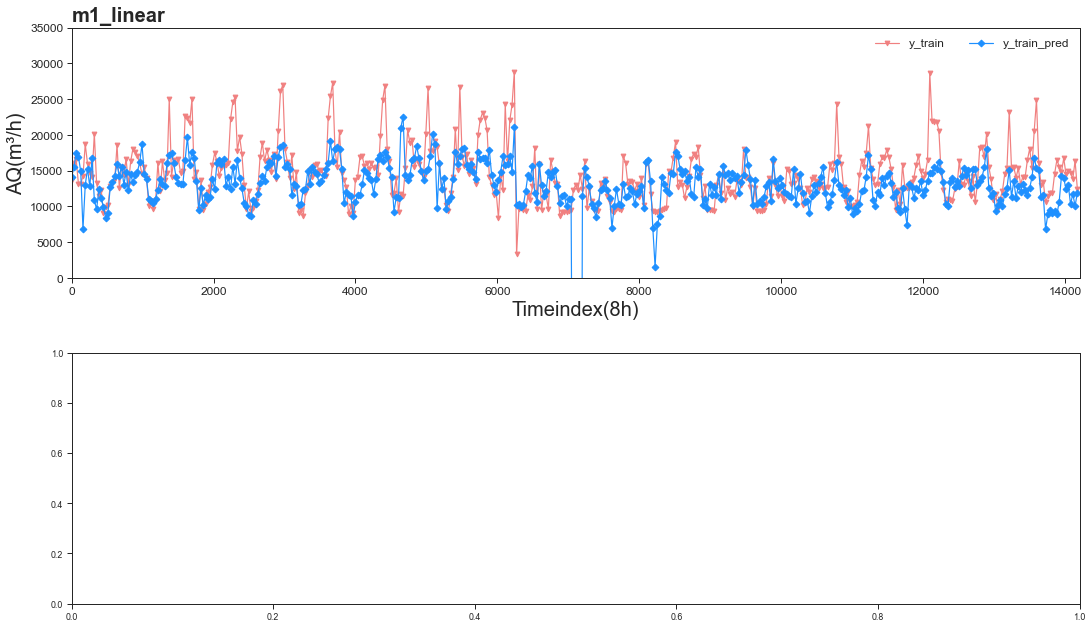

In [88]:
import seaborn as sns
sns.set(context='paper', style='ticks')

fig,axes=plt.subplots(2,1,figsize=(20,10))
ax1=axes[0]
ax2=axes[1]
fig.subplots_adjust(left=0.1, right=0.8, bottom=0.1, top=0.9, wspace=0.2, hspace=0.3)


x=train_index[::32]
y1=y_train['AQ'][::32]
y2=y_train_pred['AQ'][::32]
lns1=ax1.plot(x,y1,label='y_train',marker='v',markevery=1, color='lightcoral')
lns2=ax1.plot(x,y2,label='y_train_pred',marker='D',markevery=1, color='dodgerblue')
ax1.tick_params(labelsize=12)
ax1.set_xlim(0,14208,2000)
ax1.set_ylim(0,35000, 5000)
ax1.set_xlabel('Timeindex(8h)',size=20)
ax1.set_ylabel('AQ(m³/h)',size=20)
ax1.set_title('m1_linear',size=20,fontweight='bold',loc='left')
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=1,fontsize=12,ncol=2,frameon=False)

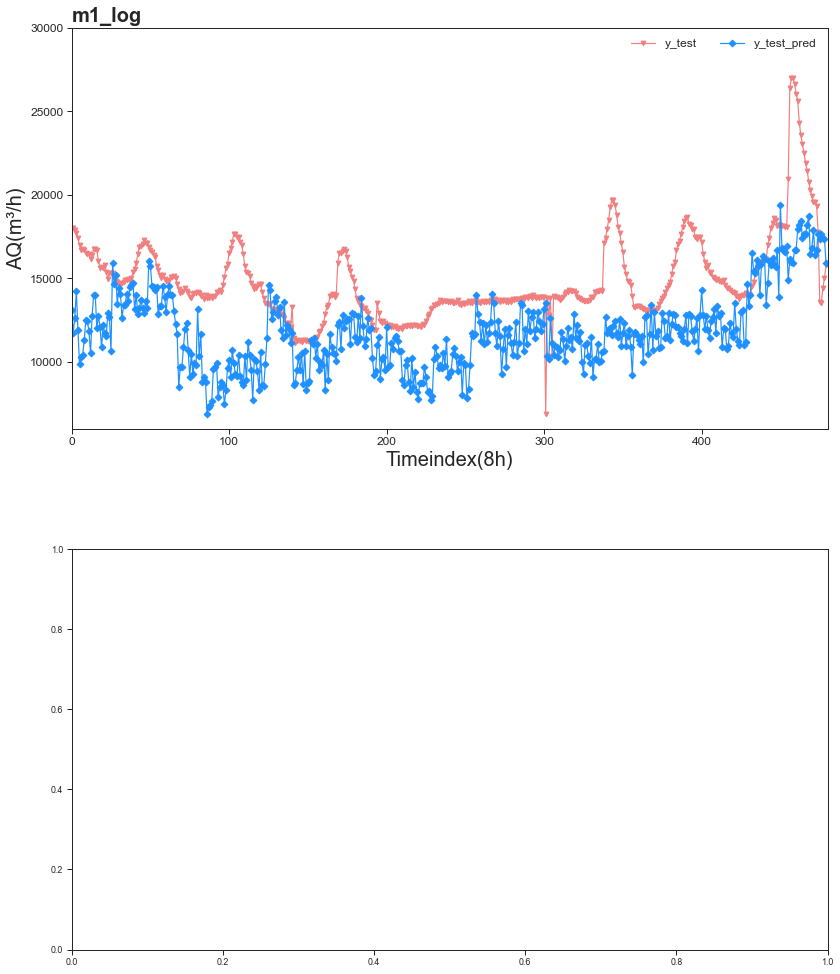

In [89]:
import seaborn as sns
sns.set(context='paper', style='ticks')

fig,axes=plt.subplots(2,1,figsize=(15,16))
ax1=axes[0]
ax2=axes[1]
fig.subplots_adjust(left=0.1, right=0.8, bottom=0.1, top=0.9, wspace=0.2, hspace=0.3)


x=test_index
y1=y_test['AQ']
y2=y_test_pred['AQ']
lns1=ax1.plot(x,y1,label='y_test',marker='v',markevery=1, color='lightcoral')
lns2=ax1.plot(x,y2,label='y_test_pred',marker='D',markevery=1, color='dodgerblue')
ax1.tick_params(labelsize=12)
ax1.set_xlim(0,480,1)
ax1.set_ylim(6000,30000, 5000)
ax1.set_xlabel('Timeindex(8h)',size=20)
ax1.set_ylabel('AQ(m³/h)',size=20)
ax1.set_title('m1_log',size=20,fontweight='bold',loc='left')
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=1,fontsize=12,ncol=2,frameon=False)

In [90]:
frame=pd.DataFrame()
frame['ytrain']=y_train_pred
frame['ytest']=y_test_pred
frame.to_excel('../goaldata/m1_Robust.xlsx')